In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# **EDA of Customers**

In [77]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [78]:
customers.shape

(200, 4)

In [79]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [80]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

In [81]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [82]:
customers['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [83]:
customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

C:\Users\darsh\AppData\Local\Temp\ipykernel_16240\1367407783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


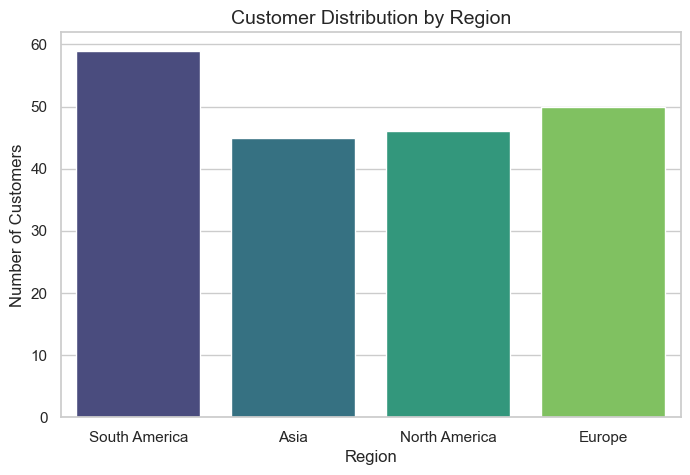

In [84]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region', fontsize=14)
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.show()

<span style="color:red">This text is red</span> and <span style="color:blue">**this text is blue**</span> and <span style="color:green">this text is green</span>.


**Customer Distribution by Region:**

- Majority of customers are from South America, followed by Asia, Europe, and North America.

In [85]:
customers.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max
CustomerID,200,200,C0001,1,NaN,NaN,NaN,NaN,NaN,NaN
CustomerName,200,200,Lawrence Carroll,1,NaN,NaN,NaN,NaN,NaN,NaN
Region,200,4,South America,59,NaN,NaN,NaN,NaN,NaN,NaN
SignupDate,200,NaN,NaN,NaN,2023-07-19 08:31:12,2022-01-22 00:00:00,2022-09-26 12:00:00,2023-08-31 12:00:00,2024-04-12 12:00:00,2024-12-28 00:00:00


# **EDA of Products**

In [86]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [87]:
products.shape

(100, 4)

In [88]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [89]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [90]:
products['Price'].describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

**Price range :** <span style="color:yellow">**$16.08**</span> to <span style="color:yellow">**$497.76**</span> 
**Average price :**
<span style="color:yellow">**$267.55**</span>

In [91]:
products['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [92]:
products['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

C:\Users\darsh\AppData\Local\Temp\ipykernel_16240\1199471144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='muted', order=products['Category'].value_counts().index)


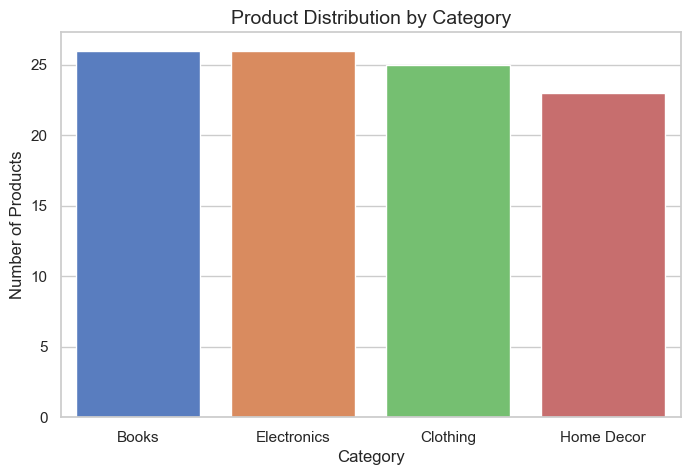

In [93]:
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='muted', order=products['Category'].value_counts().index)
plt.title('Product Distribution by Category', fontsize=14)
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.show()

**Product Distribution by Category:**

- Books dominate the product categories, followed by Electronics, Clothing, and Home Decor.

In [94]:
products.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProductID,100,100,P001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,100,66,ActiveWear Smartwatch,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,100,4,Books,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,100.0,NaN,NaN,NaN,267.5517,143.219383,16.08,147.7675,292.875,397.09,497.76


# **EDA of Transactions**


In [95]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [96]:
transactions.shape

(1000, 7)

In [97]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [98]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [99]:
transactions['TotalValue'].describe()

count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

Total transaction values range from **$16.08** to **$1991.04**.

In [100]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [101]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M') # Monthly Transaction Trends
monthly_trends = transactions.groupby('TransactionMonth').size()

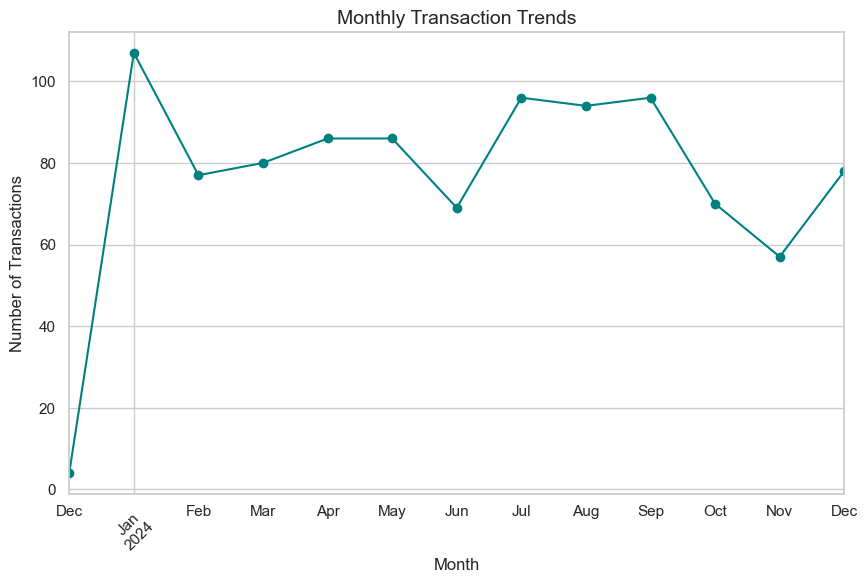

In [102]:
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Transaction Trends', fontsize=14)
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Monthly Transaction Trends:**
- Transaction activity varies over time, with noticeable peaks in specific months, indicating potential seasonality.

High-Value Customers

In [103]:
customer_values = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
customer_values.head(10) # Top 10 most Valuable customer

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Underperforming Products

In [104]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum()
underperforming_products = product_sales[product_sales == product_sales.min()]
underperforming_products

ProductID
P031    9
Name: Quantity, dtype: int64

Regional Price Sensitivity

In [105]:
regional_prices = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
regional_prices

Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64

Repeat Purchase Behavior

In [106]:
repeat_purchases = transactions.groupby('CustomerID')['TransactionID'].count().sort_values(ascending=False)
repeat_purchases.head()

CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
Name: TransactionID, dtype: int64

Category Popularity by Region

In [107]:
category_sales_region = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')
category_popularity = category_sales_region.groupby(['Region', 'Category'])['Quantity'].sum().unstack().fillna(0)


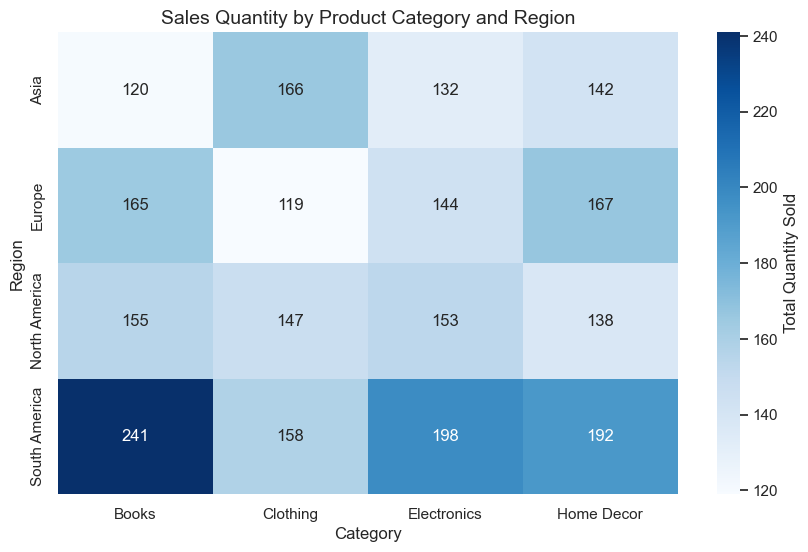

In [108]:
plt.figure(figsize=(10, 6))
sns.heatmap(category_popularity, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Total Quantity Sold'},)
plt.title('Sales Quantity by Product Category and Region',fontsize=14)
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()


Seasonal Product Demand

In [109]:
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_demand_by_category = transactions.merge(products, on='ProductID') \
    .groupby(['Month', 'Category'])['Quantity'].sum().unstack().fillna(0)



<Figure size 1200x600 with 0 Axes>

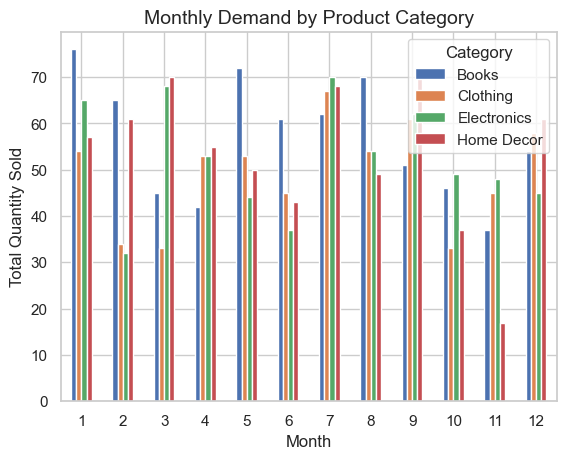

In [110]:

import matplotlib.pyplot as plt

# Plotting the monthly demand by category
plt.figure(figsize=(12,6))
monthly_demand_by_category.plot(kind='bar', stacked=False)

plt.title('Monthly Demand by Product Category',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)  # Keeping months horizontal for readability
plt.legend(title='Category')
plt.grid(True)
plt.show()
